In [59]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from functools import partial
import pickle
from matplotlib.backends.backend_pdf import PdfPages
import matplotlib.ticker as mtick

from os import mkdir
from os.path import isdir
rcParams = {'font.size': 30 , 'font.weight': 'normal', 'font.family': 'sans-serif',
            'axes.unicode_minus':False, 'axes.labelweight':'normal'}
plt.rcParams.update(rcParams)

data_dir = '/Users/harihara/Research-Activities/Data/SCRAPT/Spatial_Soil/'

colors = ['#377eb8','lime','C1', '#a65628', '#AAAA00','#bbbbbb','#000000']

alpha = [0.01, 0.05, 0.1, 0.5, 1.0]#, 5.0, 10.0] #[0.01, 0.05]
keys = ['Adaptive_With_Modeshifting',  'Adaptive_Without_Modeshifting', 
        'Fixed_With_Modeshifting',  'Fixed_Without_Modeshifting','DNACLUST', 'CDHIT', 'UCLUST']
titles = ['Adaptive Sampling + Mode-Shifting (SCRAPT)', 'Adaptive Sampling Without Mode-Shifting',
          'Naive Sampling + Mode-Shifting', 'Naive Sampling Without Mode-Shifting',
          'DNACLUST', 'CDHIT', 'UCLUST']

s = 0.95

out_path = '/Users/harihara/Research-Activities/Plots/Iterative_Clustering/Spatial_Soil/'
if not isdir(out_path):
    mkdir(out_path)
out_path = out_path+'sim_'+str(s)+'/'
if not isdir(out_path):
    mkdir(out_path)
    
f = mtick.ScalarFormatter(useOffset=False, useMathText=True)
g = lambda x,pos : "${}$".format(f._formatSciNotation('%1.1e' % x))


In [60]:


sim = pickle.load(open(data_dir+'/sim_'+str(s)+'.pkl', "rb"))
n = 16608513 #Spatial_Soil
times = {0.99:184, 0.98:836, 0.97:863, 0.96:1053, 0.95:758}#Spatial_soil 

#n = 980180 #Lupus-Published 
#times = {0.99:19, 0.98:13, 0.97:8, 0.96:5, 0.95:4}#Lupus-Published 

#n = 1773145 #Lupus-Unpublished
#times = {0.99:36, 0.98:32, 0.97:20, 0.96:13, 0.95:12} #Lupus-Unpublished

print(sim.keys())


dict_keys(['DNACLUST', 0.5, 0.05, 1.0, 0.01, 0.1, 'CDHIT'])


Plot the Number of sequences clustered in each iteration for SCRAPT

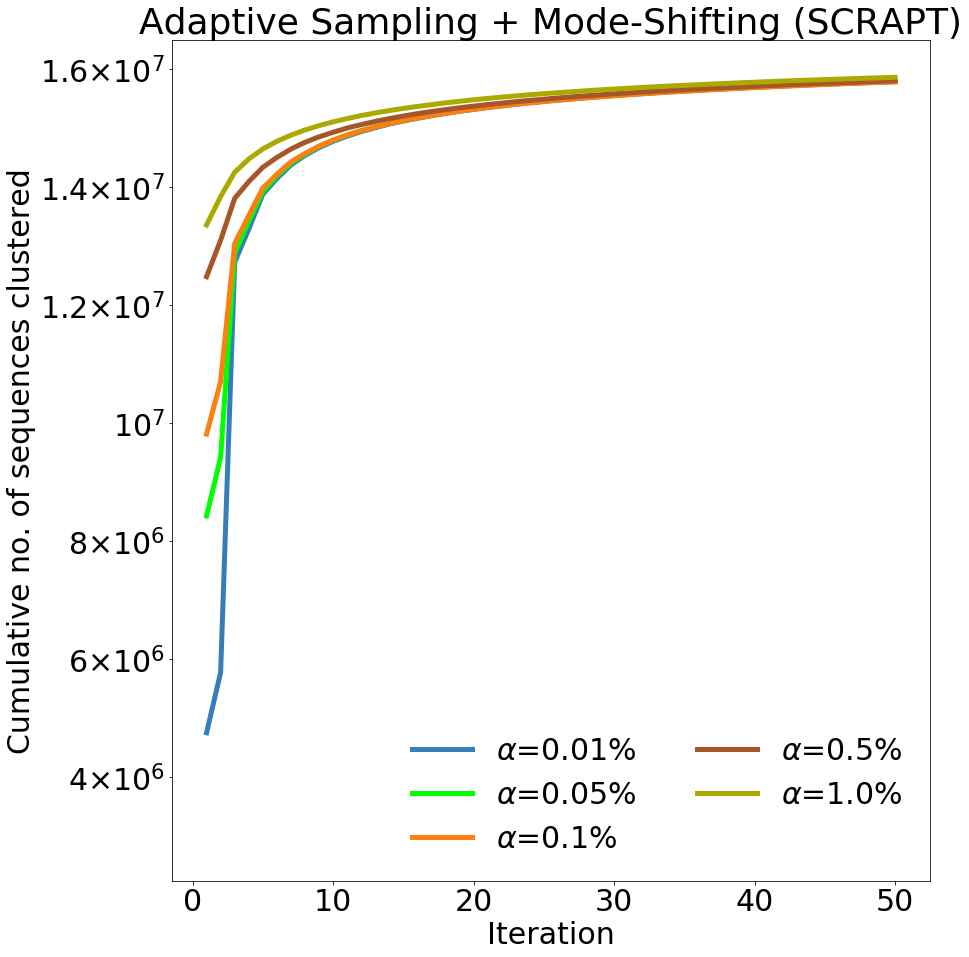

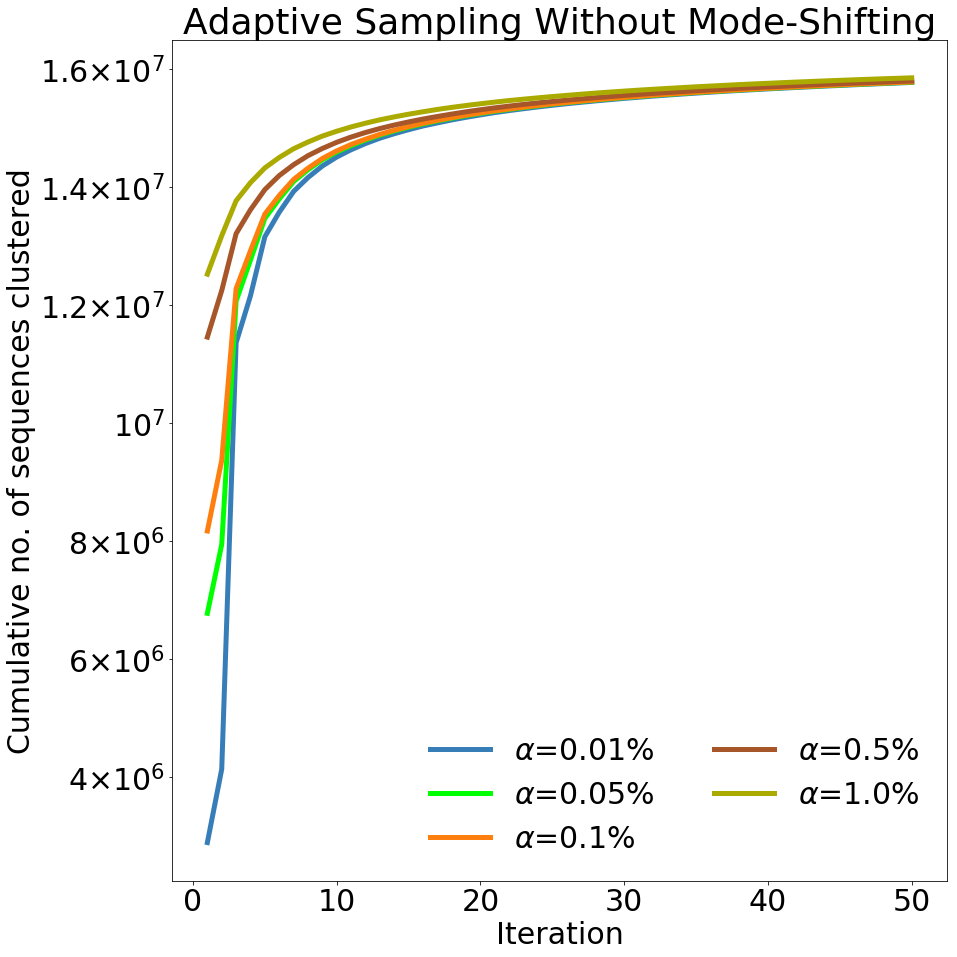

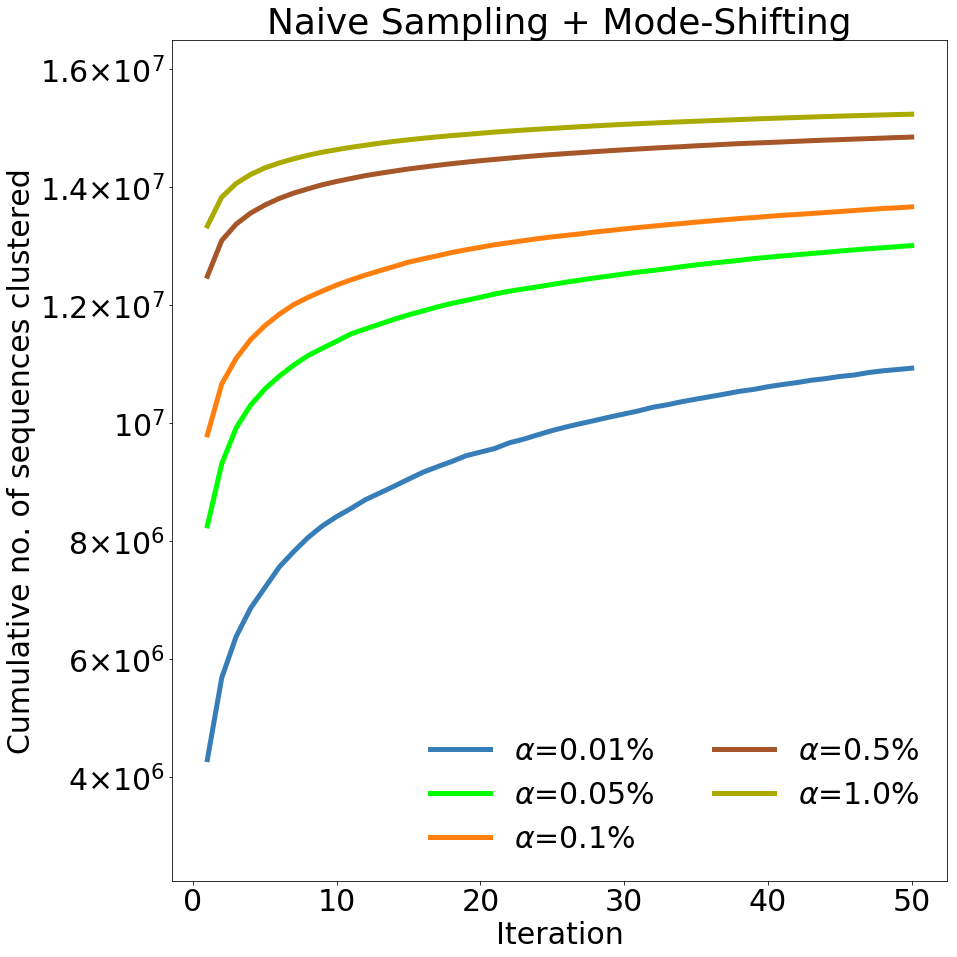

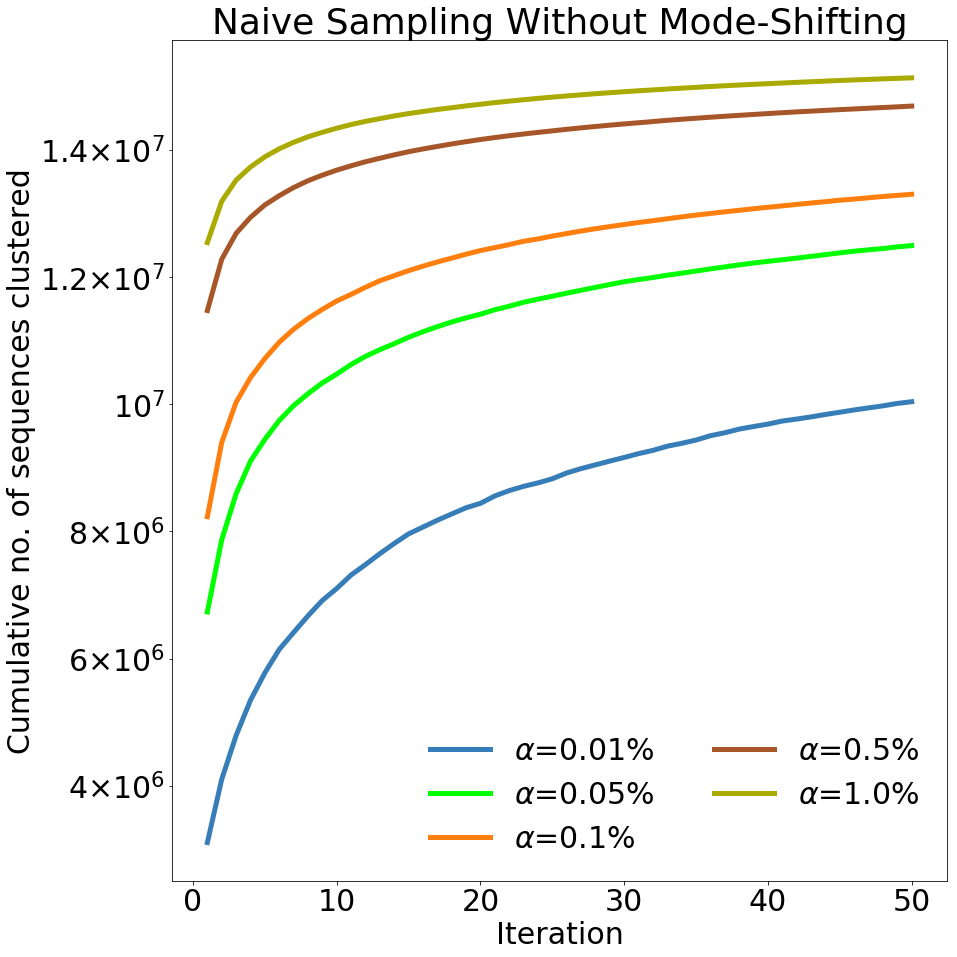

In [61]:
plt.rcParams.update(rcParams)
figures = []

for i in range(4):
    fig,ax = plt.subplots(1,1,figsize = (14,14))
    for j in range(len(alpha)):
        ax.plot(np.cumsum(sim[alpha[j]][keys[i]]['Cluster_Summary']['Seq_Counts']), color = colors[j], 
                label = r'$\alpha$='+str(alpha[j])+'%', linewidth=5)    
    ax.set_title(titles[i])
    ax.set_xlabel('Iteration')
    ax.set_ylabel('Cumulative no. of sequences clustered')
    ax.legend(loc = 4, ncol = 2, frameon=False)
    ax.yaxis.set_major_formatter(mtick.FuncFormatter(g))
    fig.tight_layout()
    figures.append((fig,ax))

ylim = figures[1][1].get_ylim()
figures[0][1].set_ylim(ylim)
figures[1][1].set_ylim(ylim)
figures[2][1].set_ylim(ylim)

for i in range(0,len(figures)):
    figures[i][0].savefig(out_path+'Cum_Seq_'+keys[i]+'_'+str(s)+'.pdf')


0.01 262.18000000000006
0.05 252.66
0.1 275.39
0.5 278.9
1.0 356.33000000000004


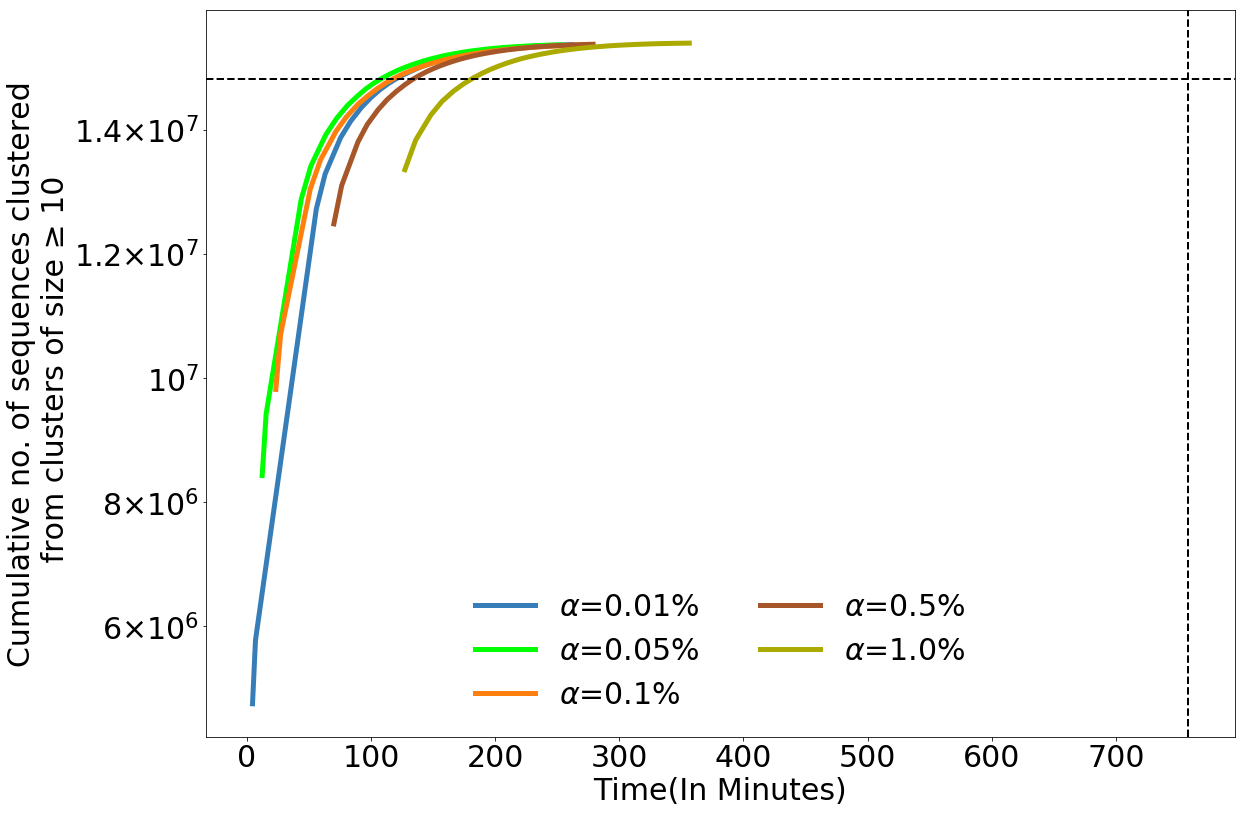

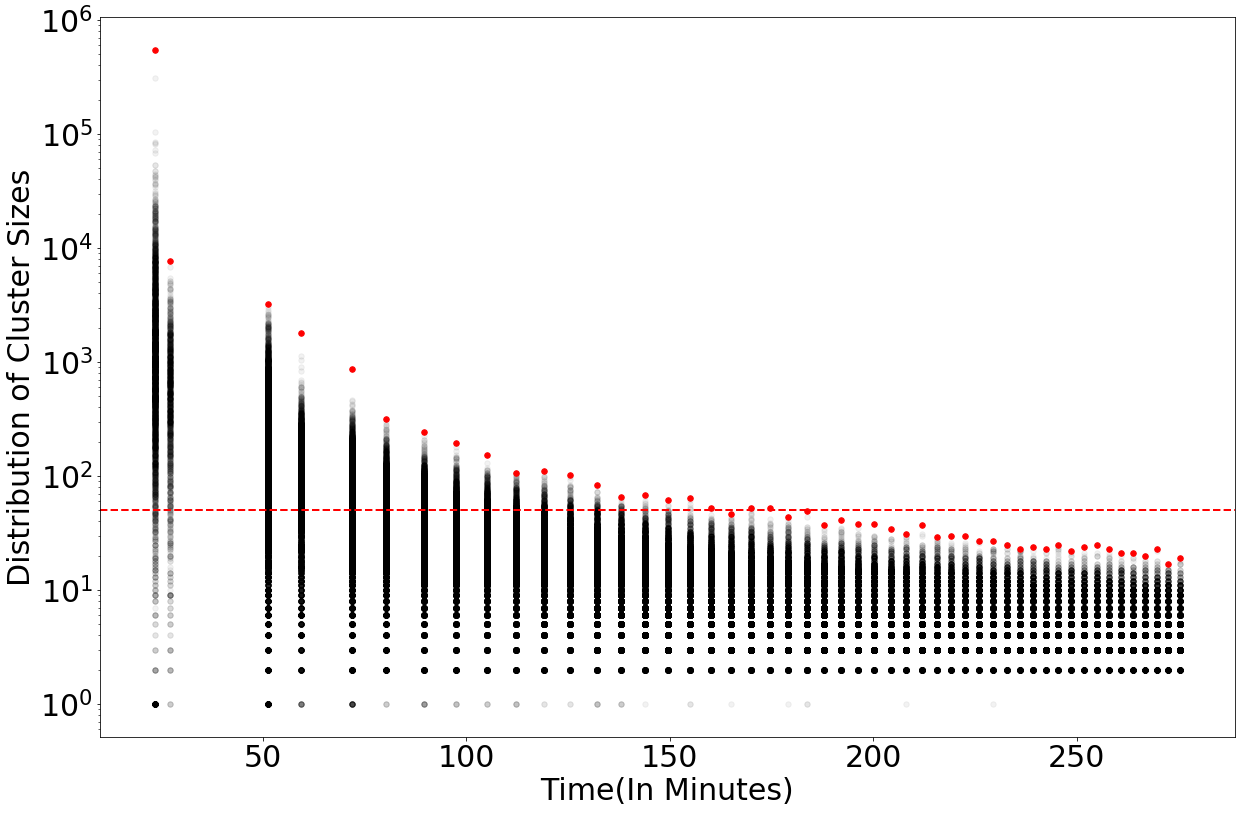

In [62]:
fig,ax = plt.subplots(1,1,figsize = (18,12))
plt.rcParams.update(rcParams)

for j in range(len(alpha)):
    print(alpha[j], np.sum(sim[alpha[j]][keys[0]]['Cluster_Summary']['Time(Total)']))
    ax.plot(np.cumsum(sim[alpha[j]][keys[0]]['Cluster_Summary']['Time(Total)']),
            np.cumsum(sim[alpha[j]][keys[0]]['Cluster_Summary']['Seqs_in_Cluster_Above_10']), 
            color = colors[j], label = r'$\alpha$='+str(alpha[j])+'%', linewidth=5)
ax.set_xlabel('Time(In Minutes)')
ax.set_ylabel('Cumulative no. of sequences clustered\n from clusters of size ≥ 10')
ax.legend()
t = np.array(sim['DNACLUST']['Clusters'])
t = t[t>=10]
ax.yaxis.set_major_formatter(mtick.FuncFormatter(g))
ax.axvline(times[s], linewidth = 2, color = 'black', linestyle = '--')
ax.axhline(t.sum(), linewidth = 2, color = 'black', linestyle = '--')
ax.legend(ncol = 2, frameon = False)
fig.tight_layout()
fig.savefig(out_path+'Cum_Seq_SCRAPT_Greater_Than_10_'+str(s)+'.pdf')

df_1 = sim[0.1]['Adaptive_With_Modeshifting']['Clusters'].set_index('Iteration')
df_2 = sim[0.1]['Adaptive_With_Modeshifting']['Cluster_Summary'].cumsum()
df_temp = df_1.join(df_2[['Time(Total)']])
fig,ax = plt.subplots(1,1,figsize = (18,12))
df_temp.plot.scatter('Time(Total)', 'Density', alpha = 0.05, ax = ax, color = 'black', s = 30)
df_temp.reset_index().groupby('Iteration').max().plot.scatter('Time(Total)', 'Density', alpha = 1, 
                                                              ax = ax, color = 'red', s = 30)
ax.axhline(50, color = 'red', linestyle = '--', linewidth = 2)
ax.set_yscale('log')
ax.set_xlabel('Time(In Minutes)')
ax.set_ylabel('Distribution of Cluster Sizes')
fig.tight_layout()
fig.savefig(out_path+'Cluster_Distribution_SCRAPT_'+str(s)+'.pdf')


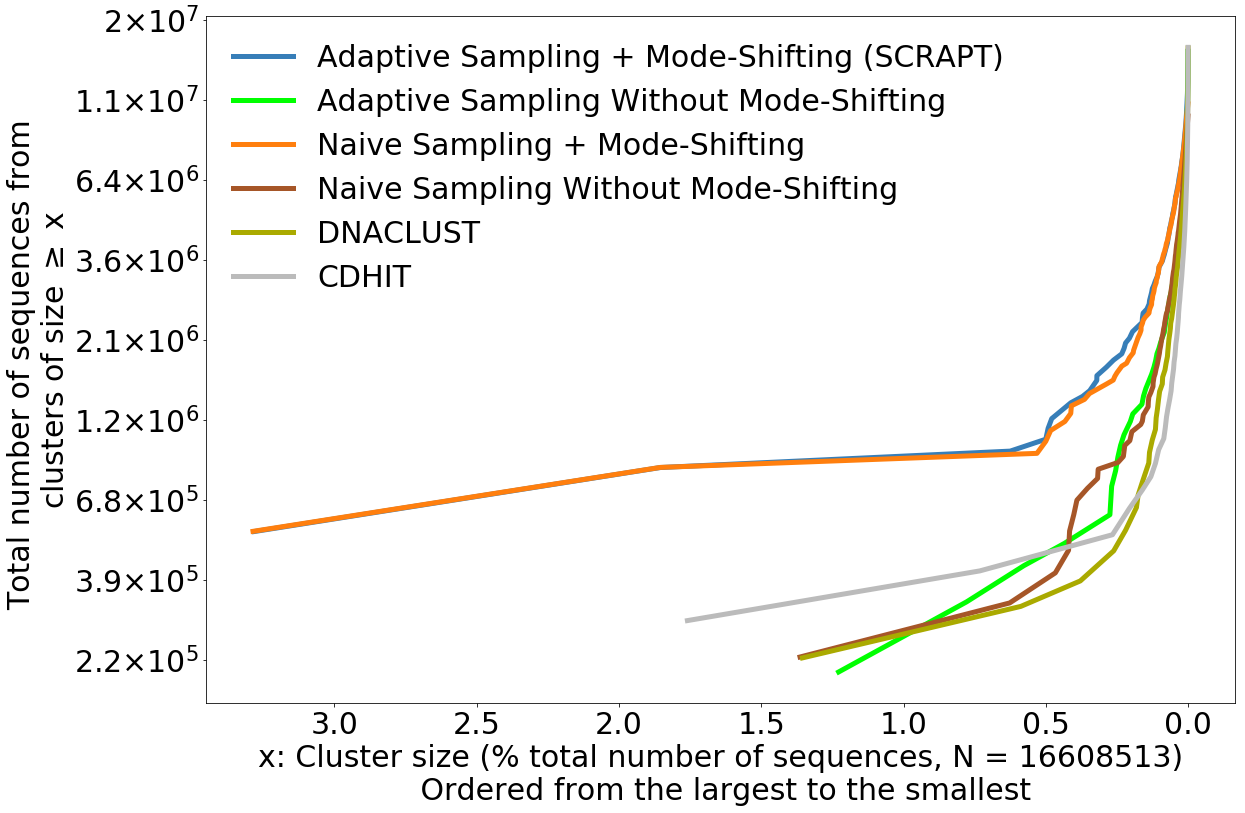

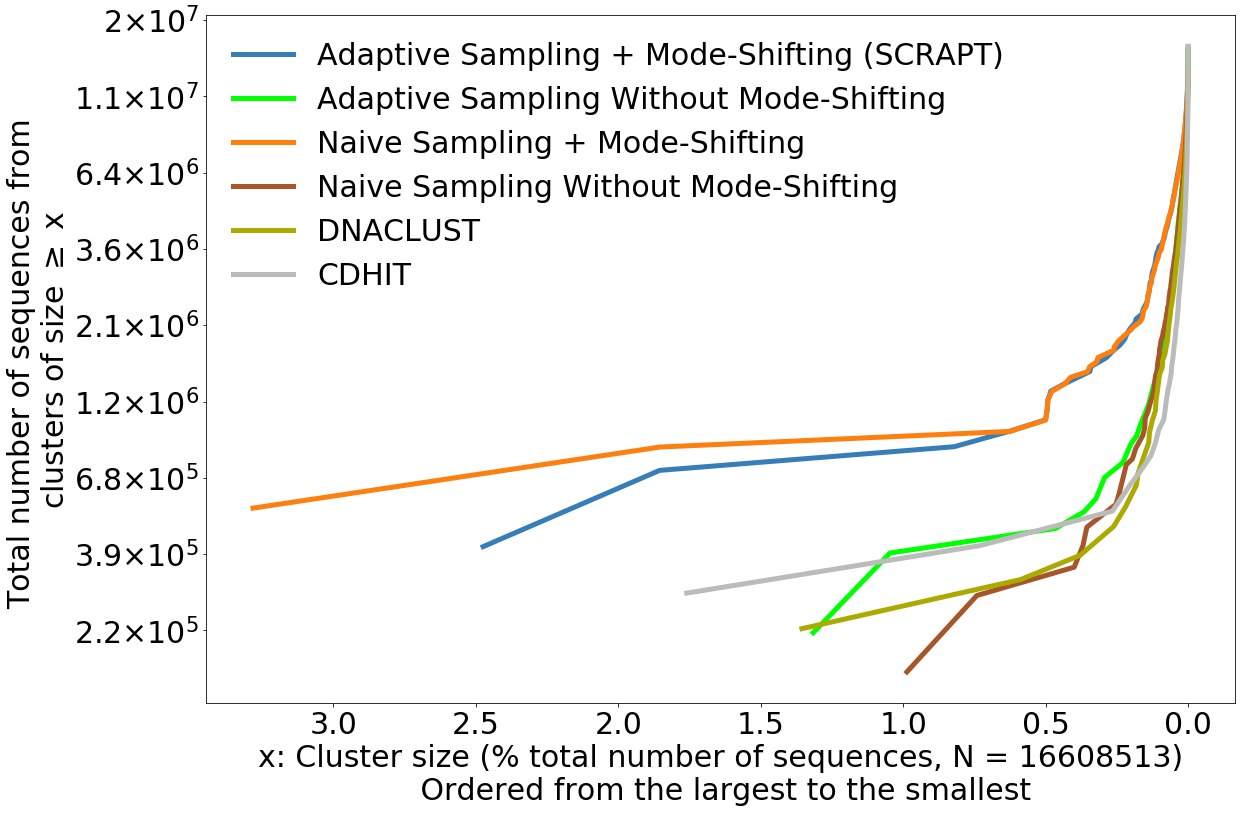

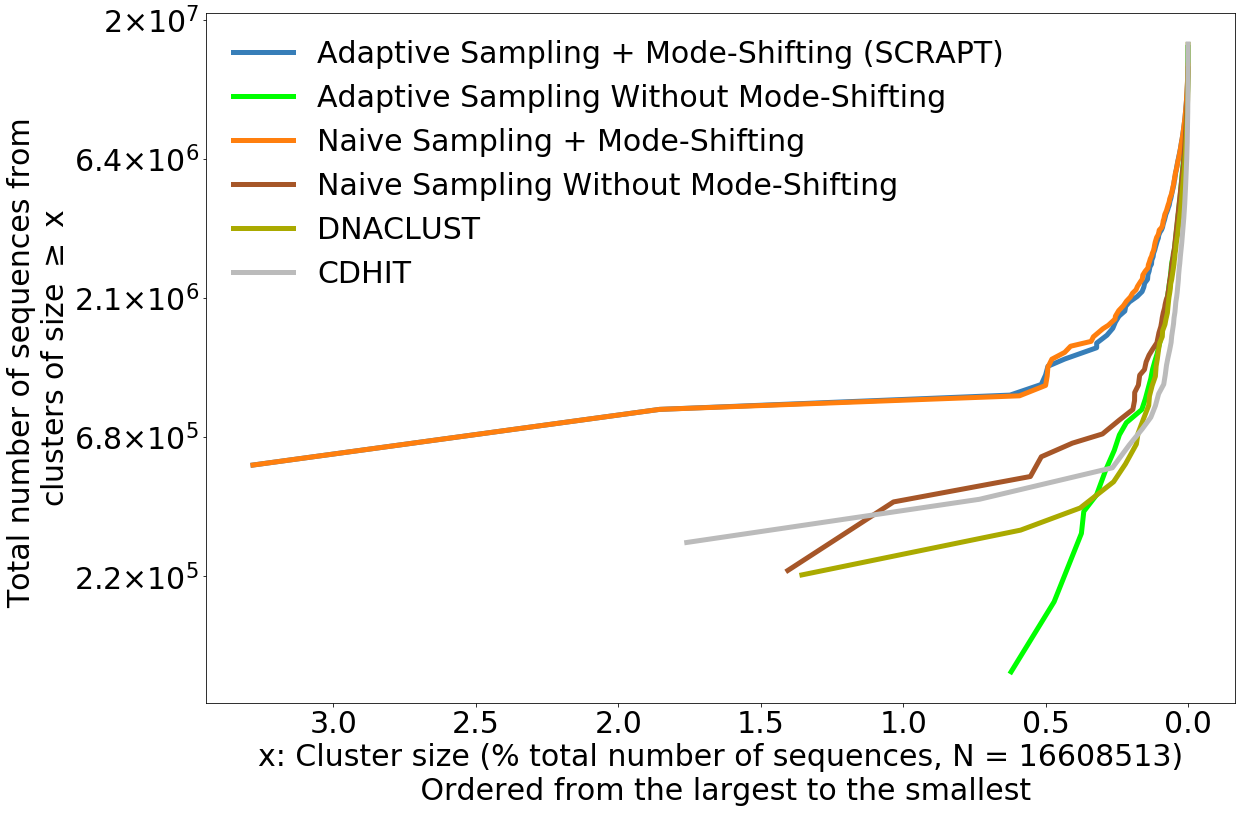

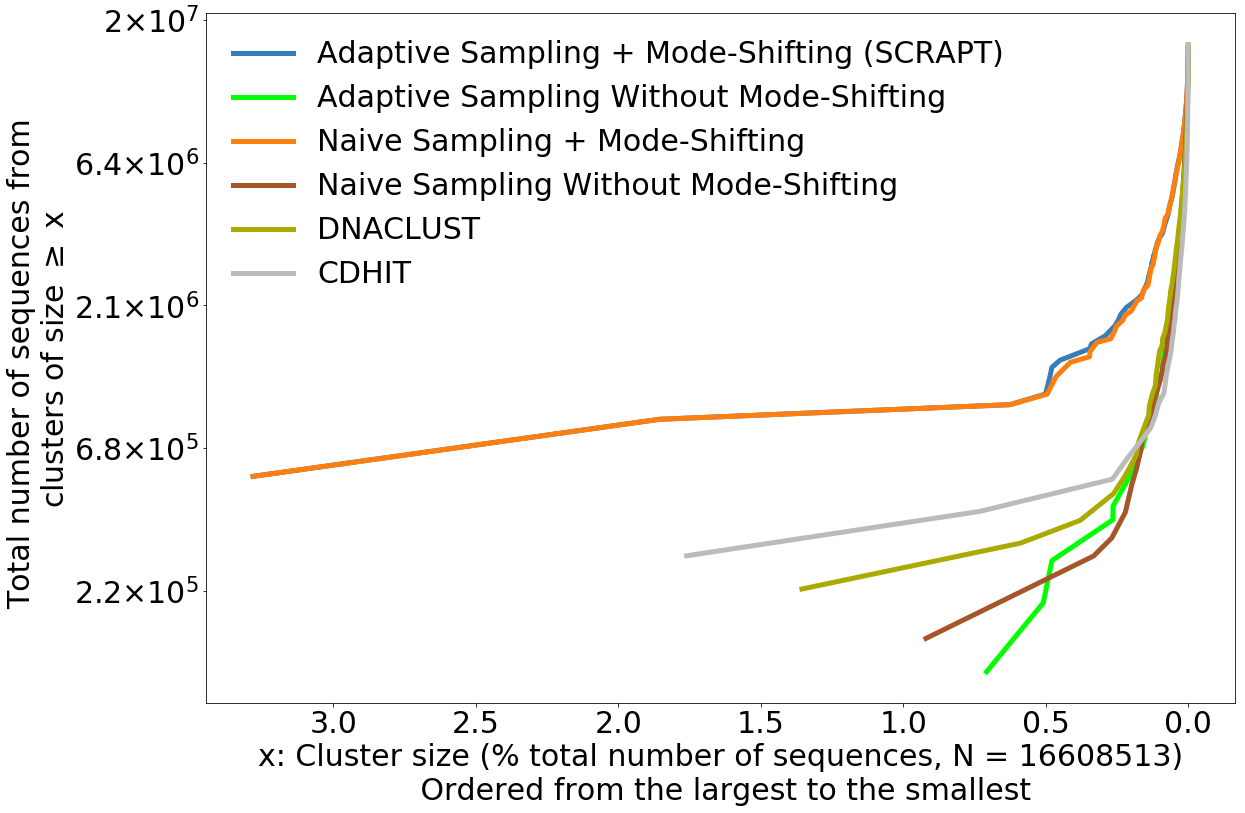

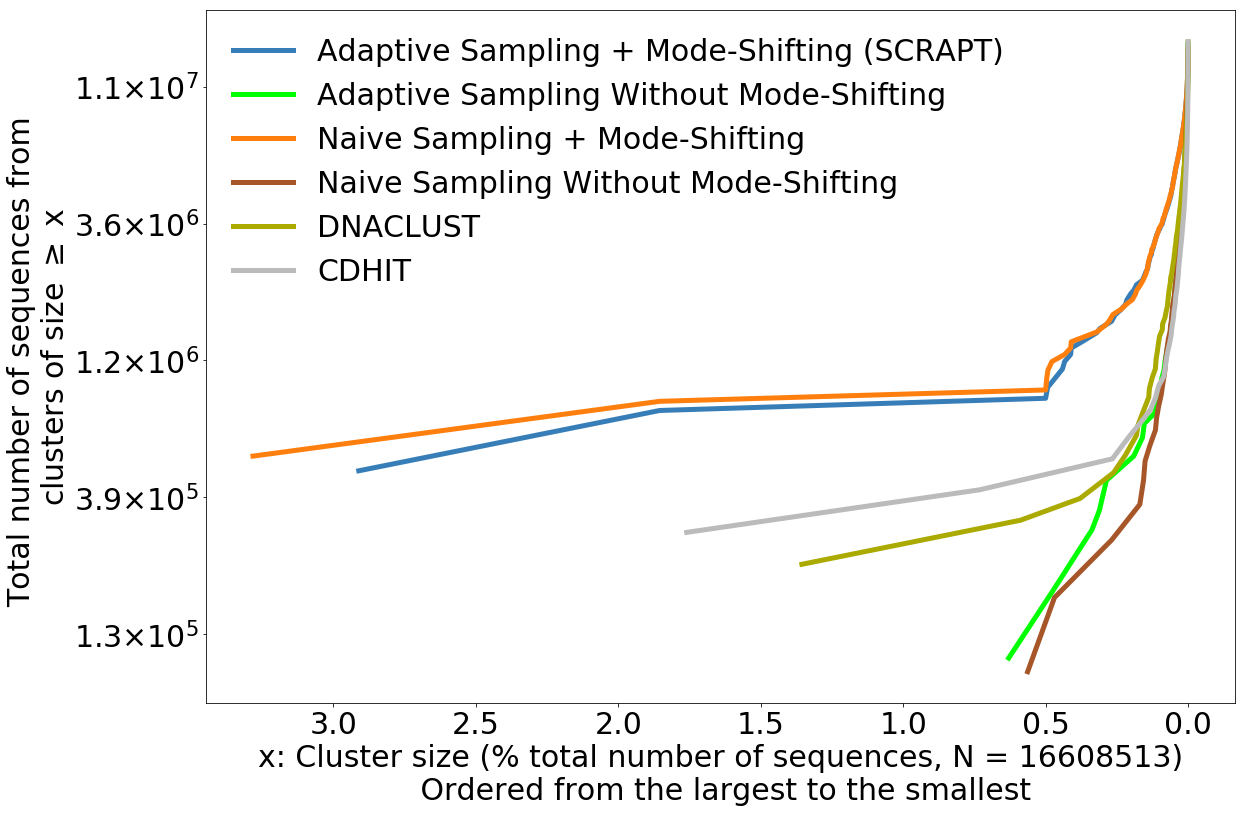

In [63]:

for a in alpha:
    fig, ax = plt.subplots(1,1,figsize = (18,12))

    for i in range(len(keys)):    
        if keys[i] != 'DNACLUST' and keys[i] != 'UCLUST' and keys[i] != 'CDHIT':
            if i == 2:
                ax.plot(np.array(sim[a][keys[i]]['Fragmentation_Measure'][1])/n*100.0,
                        sim[a][keys[i]]['Fragmentation_Measure'][0], color = colors[i], label = titles[i], 
                        linewidth=5)#, linestyle = (0,(5,10)))
            else:
                ax.plot(np.array(sim[a][keys[i]]['Fragmentation_Measure'][1])/n*100.0,
                        sim[a][keys[i]]['Fragmentation_Measure'][0], color = colors[i], label = titles[i], 
                        linewidth=5)
        try:               
            if keys[i] == 'DNACLUST' or keys[i] == 'UCLUST' or keys[i] == 'CDHIT':
                ax.plot(np.array(sim[keys[i]]['Fragmentation_Measure'][1])/n*100.0,
                        sim[keys[i]]['Fragmentation_Measure'][0], color = colors[i], label = titles[i], 
                        linewidth=5)


        except KeyError:
            pass
    #try:    
    #    print(sim[a][keys[0]]['Fragmentation_Measure'][0][-1])
    #    print(sim[a][keys[2]]['Fragmentation_Measure'][0][-1])
    #    ax.scatter(np.array(sim[a][keys[0]]['Fragmentation_Measure'][1][-1])/n*100.0,
    #               sim[a][keys[0]]['Fragmentation_Measure'][0][-1], color = colors[0], s = 200,marker = 'x')
    #    ax.scatter(np.array(sim[a][keys[0]]['Fragmentation_Measure'][1][0])/n*100.0,
    #               sim[a][keys[0]]['Fragmentation_Measure'][0][0], color = colors[0], s = 200,marker = 'x')  

    #    ax.scatter(np.array(sim[a][keys[2]]['Fragmentation_Measure'][1][-1])/n*100.0,
    #               sim[a][keys[2]]['Fragmentation_Measure'][0][-1], color = colors[2], s = 200,marker = 'x')
    #    ax.scatter(np.array(sim[a][keys[2]]['Fragmentation_Measure'][1][0])/n*100.0,
    #               sim[a][keys[2]]['Fragmentation_Measure'][0][0], color = colors[2], s = 200,marker = 'x')  
    #except KeyError:
    #    pass
    ax.set_yscale('log', basey = 1.75)
    ax.set_xlim(ax.get_xlim()[::-1])
    ylim = ax.get_ylim()
    ax.yaxis.set_major_formatter(mtick.FuncFormatter(g))
    ax.legend(loc=2, frameon = False)
    ax.set_ylabel('Total number of sequences from \n'+r'clusters of size $\geq$ x')
    ax.set_xlabel('x: Cluster size (% total number of sequences, N = '+str(n)+
                  ')\n Ordered from the largest to the smallest')
    fig.tight_layout()
    fig.savefig(out_path+'Frag_Measure_Different_Methods_'+str(a)+'_'+str(s)+'.pdf')

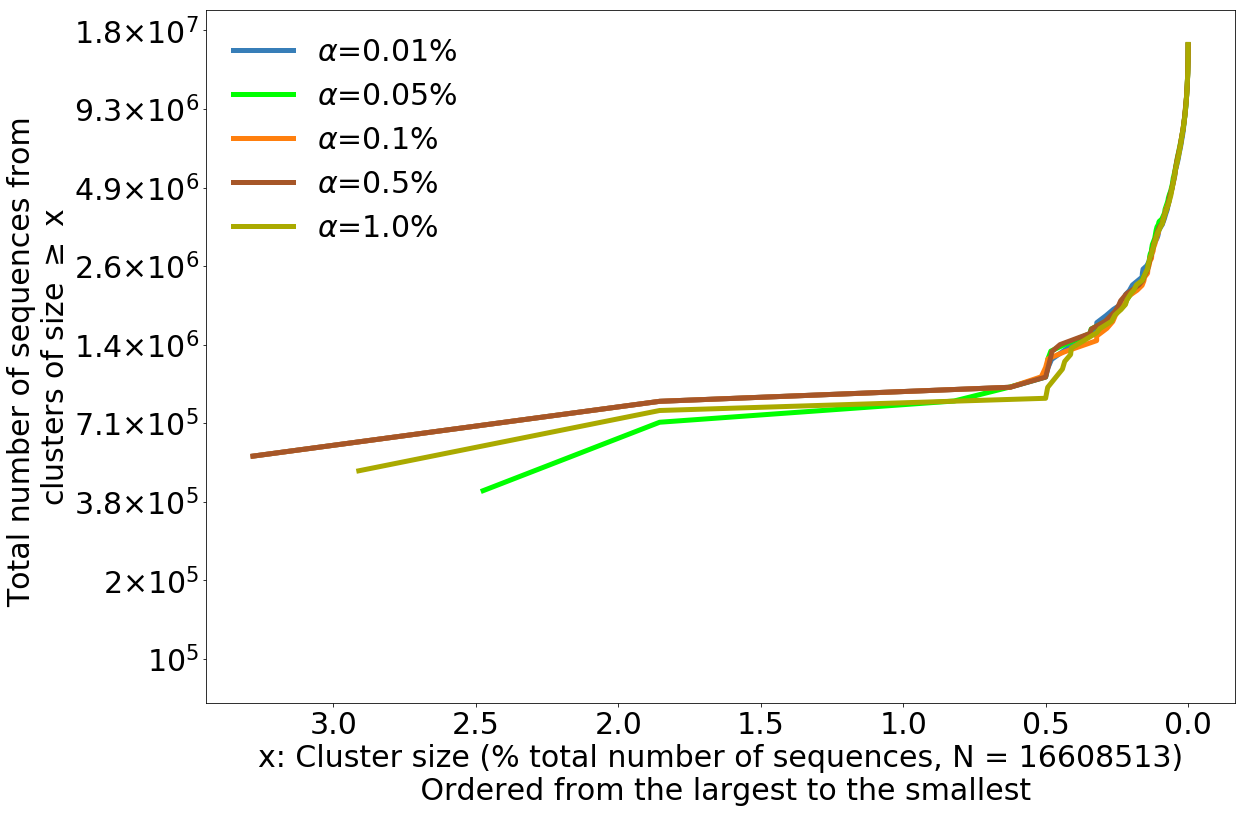

In [64]:
fig,ax = plt.subplots(1,1,figsize = (18,12))
for i in range(len(alpha)):
    a = alpha[i]
    ax.plot(np.array(sim[a][keys[0]]['Fragmentation_Measure'][1])/n*100.0,
            sim[a][keys[0]]['Fragmentation_Measure'][0], color = colors[i],label = r'$\alpha$='+str(a)+'%', 
            linewidth=5)
ax.set_yscale('log', basey = 1.9)
ax.set_xlim(ax.get_xlim()[::-1])
ax.set_ylim(ylim)
ax.yaxis.set_major_formatter(mtick.FuncFormatter(g))
ax.legend(frameon = False)
ax.set_ylabel('Total number of sequences from \n'+r'clusters of size $\geq$ x')
ax.set_xlabel('x: Cluster size (% total number of sequences, N = '+str(n)+
             ')\n Ordered from the largest to the smallest')
#ax.set_ylabel('X')
#ax.set_xlabel('Smallest cluster size (percentage of the total number of sequences, N = '+str(n)+
#              ')\n that captures X sequences')
fig.tight_layout()
fig.savefig(out_path+'Frag_Measure_SCRAPT_Different_Alpha.pdf')